# ***1.   PRE-PROCESS DATA***



Libraries

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib

from tqdm import tqdm
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing

from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV,RidgeCV

from yellowbrick.regressor import AlphaSelection

from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
from sklearn import set_config
set_config(display="diagram")

Load DataFrame

In [22]:
df = pd.read_csv('vehicles.csv')
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [23]:
df= df.reindex(columns=['id', 'region', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'state', 'price'])

Drop VIN and state

In [24]:
df_drop = df.drop(columns=['VIN','state'])

df_drop.head()

,id,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,price
0,7222695916,prescott,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6000
1,7218891961,fayetteville,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11900
2,7221797935,florida keys,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21000
3,7222270760,worcester / central MA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500
4,7210384030,greensboro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4900


Check for missing data

In [25]:
df_drop.isna().sum()

,0
id,0
region,0
year,1205
manufacturer,17646
model,5277
condition,174104
cylinders,177678
fuel,3013
odometer,4400
title_status,8242


Visual inspection for missing values, clearly size is missing the most

<Axes: >

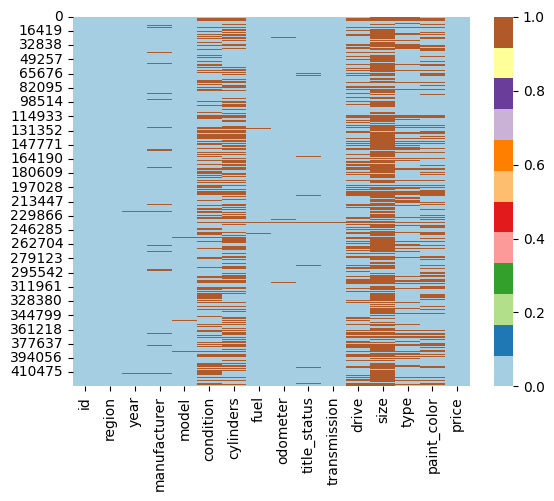

In [26]:
sns.heatmap(df_drop.isna(),cbar=True,cmap='Paired')

In [27]:
#Seperate data
num_col=['year','odometer']
cat_cols=['region','manufacturer','model','condition','cylinders','fuel','title_status','transmission','drive','size','type','paint_color']

**Handle missing values in a dataset. When some data points are missing, imputers help fill in these gaps with estimated values.**

In [28]:
hanlde_imputer=df_drop.copy()
#removes the column named ‘id’ from the copied DataFrame.
hanlde_imputer=hanlde_imputer.drop(columns=['id'])

#This initializes an instance of LabelEncoder from the preprocessing module,
#which will be used to convert categorical labels into numeric values.
encoder=preprocessing.LabelEncoder()

#function to label the categorical columns ignoring null values
def encode(data):
    #removes any null values from the column
    nonulls = np.array(data.dropna())
    #reshapes the non-null values into a 2D array, which is required by the LabelEncoder
    impute_reshape = nonulls.reshape(-1,1)
    #encodes the reshaped data
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #assigns the encoded values back to the original non-null positions in the column
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#loop to label each column or categorical values into numberic
for i in tqdm(range(len(cat_cols))):
    encode(hanlde_imputer[cat_cols[i]])

100%|██████████| 12/12 [00:01<00:00,  7.13it/s]


In [29]:
hanlde_imputer.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,price
0,277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6000
1,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11900
2,111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21000
3,396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500
4,131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4900


In [30]:
# ---------------SimpleImputer----------------------------
# This code essentially evaluates the performance of a BayesianRidge regression
# model on a dataset with missing values, using two different imputation
# strategies ('mean' and 'median') to fill in the missing values.
#The performance is measured using cross-validation and the mean squared error.

# Empty DataFrame to store the mean squared error (MSE)
#for different imputation strategies.
score_simple_imputer = pd.DataFrame()
#computing MSE for mean and median
for strategy in ('mean', 'median'):
    #X contains all columns except the last one from hanlde_imputer.
    X=hanlde_imputer.iloc[:,:-1]
    #y is the target variable, which is the last column of hanlde_imputer,
    #flattened into a 1D array using np.ravel.
    y = np.ravel(hanlde_imputer.iloc[:,-1:])
    #estimator is a pipeline that first imputes missing values using
    #SimpleImputer with the current strategy ('mean' or 'median'),
    #and then applies the BayesianRidge regression model.
    estimator = make_pipeline(
        SimpleImputer(missing_values=np.nan, strategy=strategy),BayesianRidge())
    #cross_val_score performs cross-validation on the pipeline, calculating the
    #negative mean squared error (MSE) for each split.
    #The results are stored in score_simple_imputer under the respective strategy.
    score_simple_imputer[strategy] = cross_val_score(
        estimator,
        X,
        y,
        scoring='neg_mean_squared_error',
        cv=6 #defining the cross-validation splitting strategy
    )

In [31]:
# ------------------------IterativeImputer----------------------

#Defining Estimators:
# These models will be used as estimators for the IterativeImputer.
estimators = [
    BayesianRidge(),
    DecisionTreeRegressor(max_features='sqrt', random_state=0),
    ExtraTreesRegressor(n_estimators=8, random_state=0),
    KNeighborsRegressor(n_neighbors=12)
]

# An empty DataFrame score_iterative_imputer is
# initialized to store the cross-validation scores for each estimator.
score_iterative_imputer = pd.DataFrame()

# For each column in hanlde_imputer:
# Missing values are imputed using the IterativeImputer and the current estimator.
# The imputed data is converted to integers and reshaped into a DataFrame.
# The imputed column replaces the original column in df_new.
# X is set to all columns except the last one in df_new.
# y is set to the last column of df_new, flattened into a 1D array.
# Cross-validation is performed using the current estimator,
# and the negative mean squared error (MSE) scores are stored
# in score_iterative_imputer under the name of the current estimator.
for esti in estimators:
        print("Estimating",esti.__class__.__name__)
        imputer = IterativeImputer(esti)
        df_new=hanlde_imputer.copy()
        for col in hanlde_imputer.columns:
            impute_data=imputer.fit_transform(df_new[col].values.reshape(-1,1))
            impute_data=impute_data.astype('int64')
            impute_data = pd.DataFrame(np.ravel(impute_data))
            df_new[col]=impute_data
        X=df_new.iloc[:,:-1]
        y = np.ravel(df_new.iloc[:,-1:])
        score_iterative_imputer[esti.__class__.__name__] = cross_val_score(esti,X,y,scoring='neg_mean_squared_error',cv=6)



Estimating BayesianRidge
Estimating DecisionTreeRegressor
Estimating ExtraTreesRegressor
Estimating KNeighborsRegressor


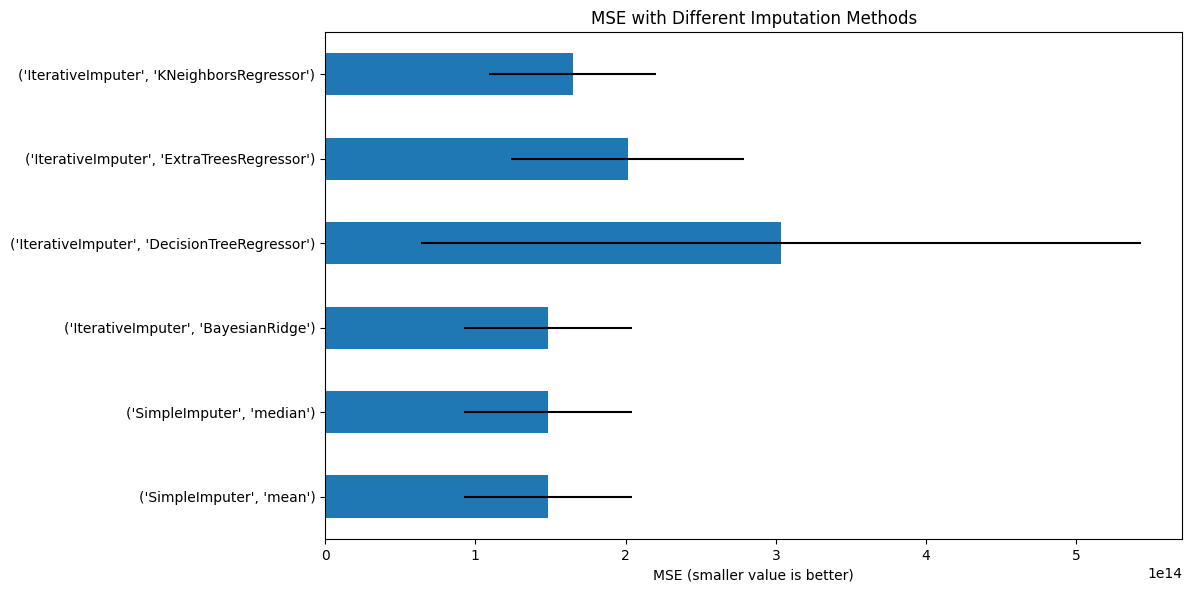

In [32]:
# Combine the score_simple_imputer and score_iterative_imputer
# into a single DataFrame called comb_scores.
# The keys parameter labels the columns from each DataFrame
# as 'SimpleImputer' and 'IterativeImputer'.
# axis=1 concatenates the DataFrames horizontally (column-wise).
comb_scores = pd.concat(
    [score_simple_imputer, score_iterative_imputer],
    keys=['SimpleImputer', 'IterativeImputer'], axis=1
)

fig, ax = plt.subplots(figsize=(12, 6))
means = -comb_scores.mean()
errors = comb_scores.std()
means.plot.barh(xerr=errors, ax=ax)
ax.set_title('MSE with Different Imputation Methods')
ax.set_xlabel('MSE (smaller value is better)')
ax.set_yticks(np.arange(means.shape[0]))
ax.set_yticklabels(means.index.tolist())
plt.tight_layout(pad=1)
plt.savefig('different-imputations-method',dpi=None)
plt.show()

In [33]:
df_drop.isnull().sum()[num_col]

,0
year,1205
odometer,4400


In [34]:
# Filling Numerical missing Values i.e year & odometer

data_num=df_drop[num_col]
imputer_num=IterativeImputer(estimators[0]) #estimators[0] = BayesianRidge
impute_data=imputer_num.fit_transform(data_num)
df_drop[num_col]=impute_data
df_drop.isnull().sum()[num_col]

,0
year,0
odometer,0


In [35]:
# Filling Categorical values
#Missing values before filling
df_drop.isnull().sum()[cat_cols]

,0
region,0
manufacturer,17646
model,5277
condition,174104
cylinders,177678
fuel,3013
title_status,8242
transmission,2556
drive,130567
size,306361


In [36]:
#data_cat is a DataFrame that contains only the categorical columns.
data_cat=df_drop[cat_cols]

#encoder is an instance of LabelEncoder from sklearn.preprocessing.
encoder=preprocessing.LabelEncoder()
#create a for loop to iterate through each column in the data
for columns in cat_cols:
    encode(data_cat[columns])
    imputer = IterativeImputer(BayesianRidge())
    impute_data=imputer.fit_transform(data_cat[columns].values.reshape(-1, 1))
    impute_data=impute_data.astype('int64')
    impute_data = pd.DataFrame(impute_data)
    impute_data = encoder.inverse_transform(impute_data.values.reshape(-1, 1))
    data_cat[columns]=impute_data
df_drop[cat_cols]=data_cat

df_drop.isnull().sum()[cat_cols]

,0
region,0
manufacturer,0
model,0
condition,0
cylinders,0
fuel,0
title_status,0
transmission,0
drive,0
size,0


<Axes: >

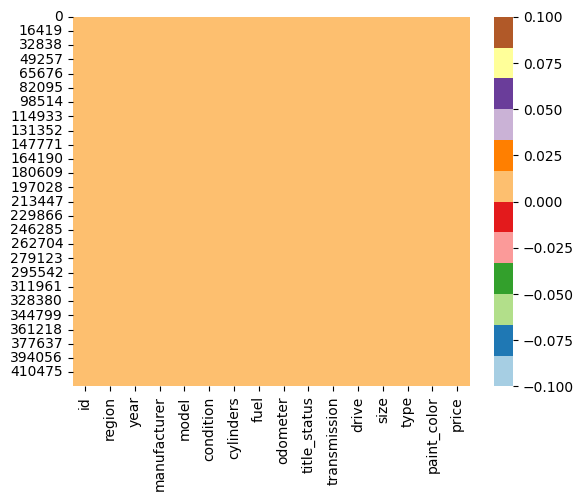

In [37]:
#Visual inspection for missing values
sns.heatmap(df_drop.isna(), cbar=True,cmap='Paired')


In [38]:
#No null value in the dataset
df_drop.isnull().sum()

,0
id,0
region,0
year,0
manufacturer,0
model,0
condition,0
cylinders,0
fuel,0
odometer,0
title_status,0


In [39]:
df_drop.to_csv('vehicles_no_null.csv',index=False)
df_drop=pd.read_csv('vehicles_no_null.csv')

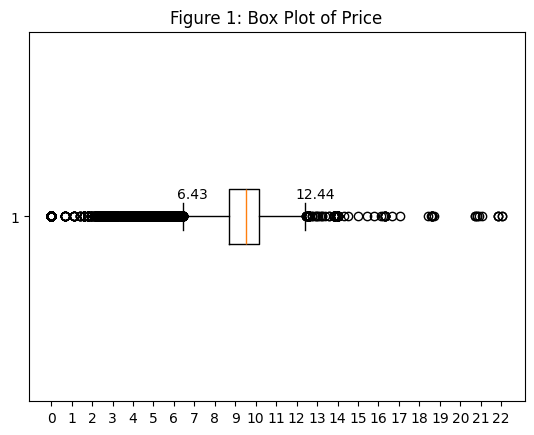

In [42]:
#_Calculate the lower and upper bounds for outliers using the Interquartile Range (IQR) method.
def min_max_price(df):
    r=[]
    q1,q3=(df['logprice'].quantile([0.25,0.75]))
    #The lower bound is calculated as q1 - 1.5 * IQR and the
    # upper bound as q3 + 1.5 * IQR.
    r.append(q1 - 1.5 * (q3-q1))
    r.append(q3 + 1.5 * (q3-q1))
    return (r)
# creates a new column logprice in the DataFrame df2 by applying the natural
# logarithm to the price column. This transformation helps in normalizing the
# data, especially if the price values span several orders of magnitude.
df_drop['logprice'] = np.log(df_drop['price'])

#x is assigned the logprice column, which will be used for plotting.
x=df_drop['logprice']

#price_range is a list of integers from 0 to the maximum value of logprice.
price_range=list(range(0,int(max(df_drop['logprice']))+1))
red_square = dict(markerfacecolor='g', marker='s')
plt.boxplot(x, vert=False)
plt.xticks(price_range)
plt.text(min_max_price(df_drop)[0]-0.3,1.05,str(round(min_max_price(df_drop)[0],2)))
plt.text(min_max_price(df_drop)[1]-0.5,1.05,str(round(min_max_price(df_drop)[1],2)))
plt.title("Figure 1: Box Plot of Price")
plt.savefig('graph-boxplot-price.jpg')
plt.show()

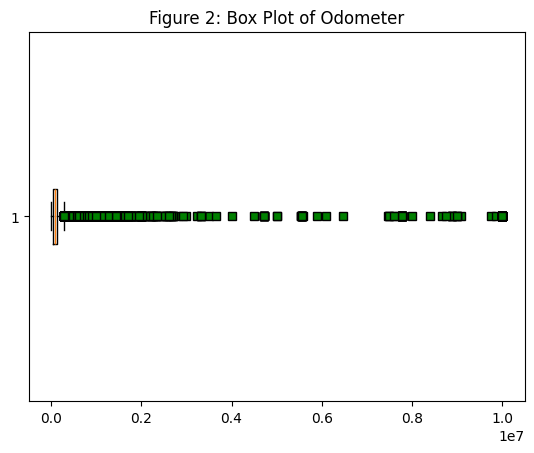

In [43]:
fig, ax1 = plt.subplots()
ax1.set_title('Figure 2: Box Plot of Odometer')
ax1.boxplot(df_drop['odometer'], vert=False, flierprops=red_square)
plt.savefig('graph-boxplot-odometer.jpg')
plt.show()

In [44]:
def find_outliers(arr, col):
    Q1 = arr[col].quantile(0.25)
    Q3 = arr[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = arr[(arr[col] < lower_bound) | (arr[col] > upper_bound)]
    return lower_bound, upper_bound, outliers

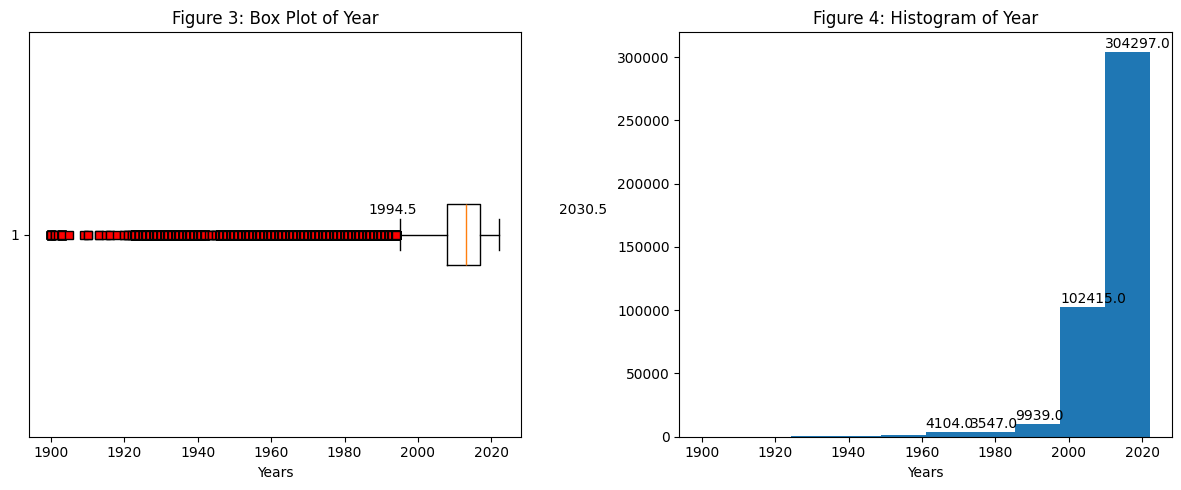

In [45]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

#ploting boxplot
lower_bound, upper_bound, outliers = find_outliers(df_drop, 'year')
ax1.boxplot(sorted(df_drop['year']), vert=False, flierprops=dict(markerfacecolor='r', marker='s'))
ax1.set_xlabel("Years")
ax1.set_title("Figure 3: Box Plot of Year")
ax1.text(lower_bound - 8, 1.05, str(round(lower_bound, 2)))
ax1.text(upper_bound + 8, 1.05, str(round(upper_bound, 2)))

# Plotting histogram
hist, bins = np.histogram(df_drop['year'])
n, bins, patches = ax2.hist(x=df_drop['year'], bins=bins)
ax2.set_xlabel("Years")
ax2.set_title("Figure 4: Histogram of Year")
for i in range(len(n)):
    if n[i] > 2000:
        ax2.text(bins[i], n[i] + 3000, str(n[i]))

plt.tight_layout()
plt.savefig('graph-barplot-histogram-year.jpg', dpi=1200)
plt.show()

In [46]:
#removing outliers
df_new=df_drop.copy()
out=np.array(['logprice','odometer','year'])
for col in out:
    lower_bound, upper_bound, outliers = find_outliers(df_new,col)
    df_new=df_new[(df_new[col] >= lower_bound) & (df_new[col] <= upper_bound)]
    print('IQR of',col,'=', lower_bound, upper_bound)
df_new=df_new[df_new['price']!=0]
df_new.drop('logprice',axis=1,inplace=True)

IQR of logprice = 6.430225879298416 12.436843880886133
IQR of odometer = -107750.0 282250.0
IQR of year = 1994.5 2030.5


In [47]:
df_new.head()

,id,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,price
0,7222695916,prescott,2011.23645,infiniti,g series,fair,5 cylinders,gas,98008.073971,clean,automatic,4wd,full-size,offroad,grey,6000
1,7218891961,fayetteville,2011.23645,infiniti,g series,fair,5 cylinders,gas,98008.073971,clean,automatic,4wd,full-size,offroad,grey,11900
2,7221797935,florida keys,2011.23645,infiniti,g series,fair,5 cylinders,gas,98008.073971,clean,automatic,4wd,full-size,offroad,grey,21000
3,7222270760,worcester / central MA,2011.23645,infiniti,g series,fair,5 cylinders,gas,98008.073971,clean,automatic,4wd,full-size,offroad,grey,1500
4,7210384030,greensboro,2011.23645,infiniti,g series,fair,5 cylinders,gas,98008.073971,clean,automatic,4wd,full-size,offroad,grey,4900


In [48]:
print("Shape before process=",df.shape)
print("Shape After process=",df_new.shape)
diff=df.shape[0]-df_new.shape[0]
print("Total {} rows and {} cols removed".format(diff,df.shape[1]-df_new.shape[1]))
df_new.to_csv("vehicles_pre_processed.csv",index=False)

Shape before process= (426880, 18)
Shape After process= (364453, 16)
Total 62427 rows and 2 cols removed


# ***2.   DATA-VISUALIZATION***

In [49]:
df=pd.read_csv("vehicles_pre_processed.csv")
df['year']=df['year'].astype('int64')
#drop the id column
df.drop(['id'],axis=1,inplace=True)
df.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,price
0,prescott,2011,infiniti,g series,fair,5 cylinders,gas,98008.073971,clean,automatic,4wd,full-size,offroad,grey,6000
1,fayetteville,2011,infiniti,g series,fair,5 cylinders,gas,98008.073971,clean,automatic,4wd,full-size,offroad,grey,11900
2,florida keys,2011,infiniti,g series,fair,5 cylinders,gas,98008.073971,clean,automatic,4wd,full-size,offroad,grey,21000
3,worcester / central MA,2011,infiniti,g series,fair,5 cylinders,gas,98008.073971,clean,automatic,4wd,full-size,offroad,grey,1500
4,greensboro,2011,infiniti,g series,fair,5 cylinders,gas,98008.073971,clean,automatic,4wd,full-size,offroad,grey,4900


In [50]:
df.shape

(364453, 15)

In [51]:
df.columns

Index(['region', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'price'],
      dtype='object')

In [52]:
#select random 100 samples
df2=df.sample(100)
df2.shape

(100, 15)

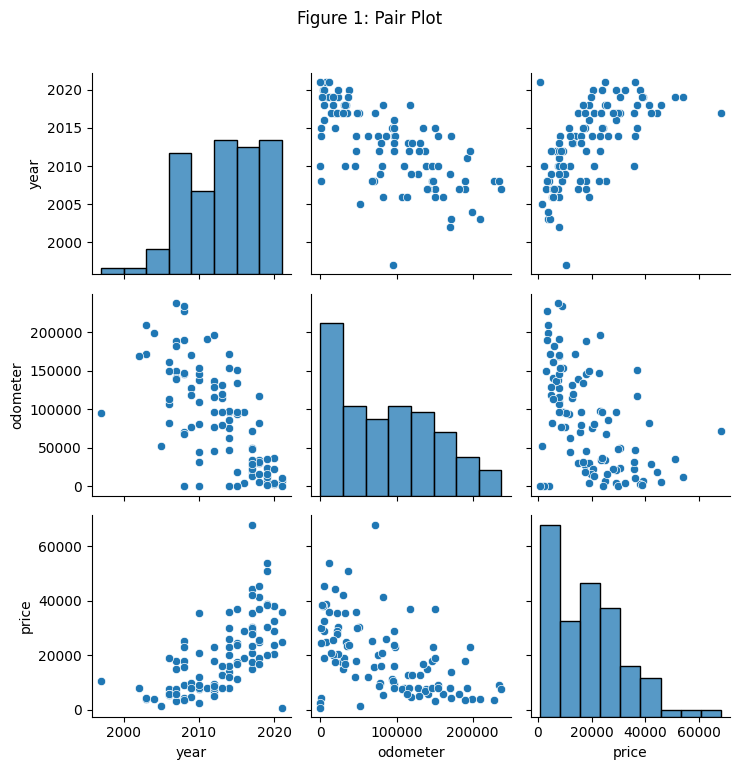

In [54]:
# scatter plots for pairwise relationships between numeric columns
sns.pairplot(df2, palette='viridis')

plt.suptitle('Figure 1: Pair Plot', y=1.02)
plt.tight_layout()
plt.savefig('pairwise relationships between numeric columns.jpg',dpi=None)
plt.show()

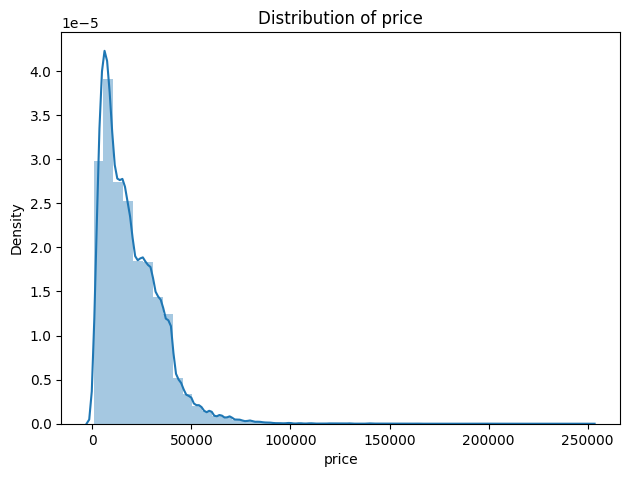

In [55]:
# This code visualizes the distribution of price in the dataset, providing insights into how prices are spread
sns.distplot(df.price)
plt.tight_layout()
plt.title("Distribution of price")
plt.savefig('distribution of price in the dataset.jpg',dpi=None)
plt.show()

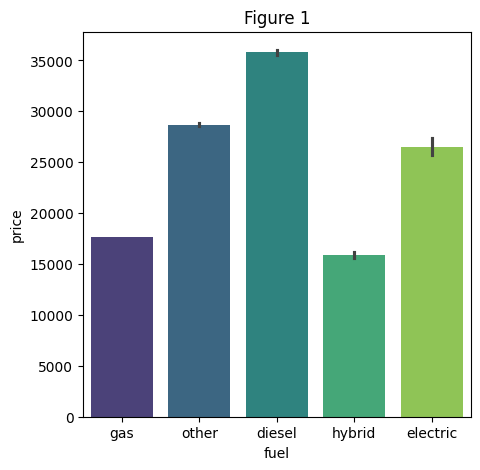

In [56]:
# Relationship between fuel type and price
fig,axs=plt.subplots()
fig.set_size_inches(5,5)

p1 = sns.barplot(x='fuel', y='price', data=df, ax=axs, palette='viridis')
axs.set_title('Figure 1')

plt.savefig('Relationship between fuel type and price.jpg',dpi=None)
plt.show()


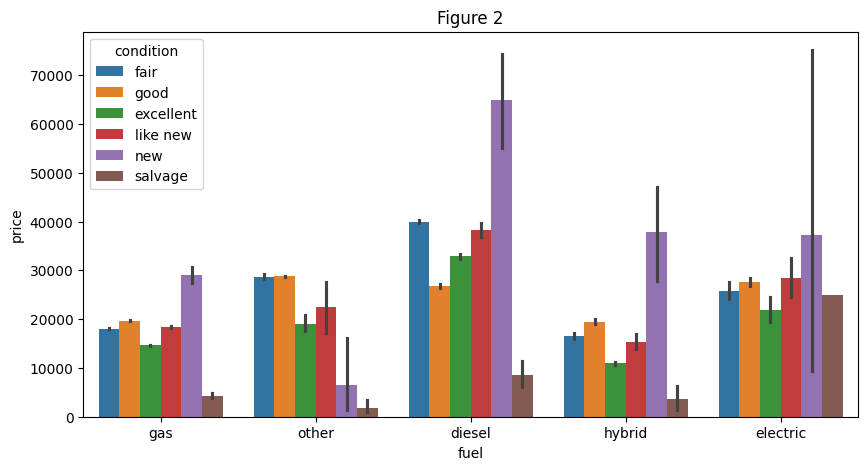

In [57]:
# Relationship between fuel type, price, and condition
plt.figure(figsize=(10,5))
sns.barplot(x='fuel',y='price',hue='condition',data=df)
plt.title('Figure 2')
plt.savefig('Relationship between fuel type, price, and condition,jpg',dpi=None)
plt.show()

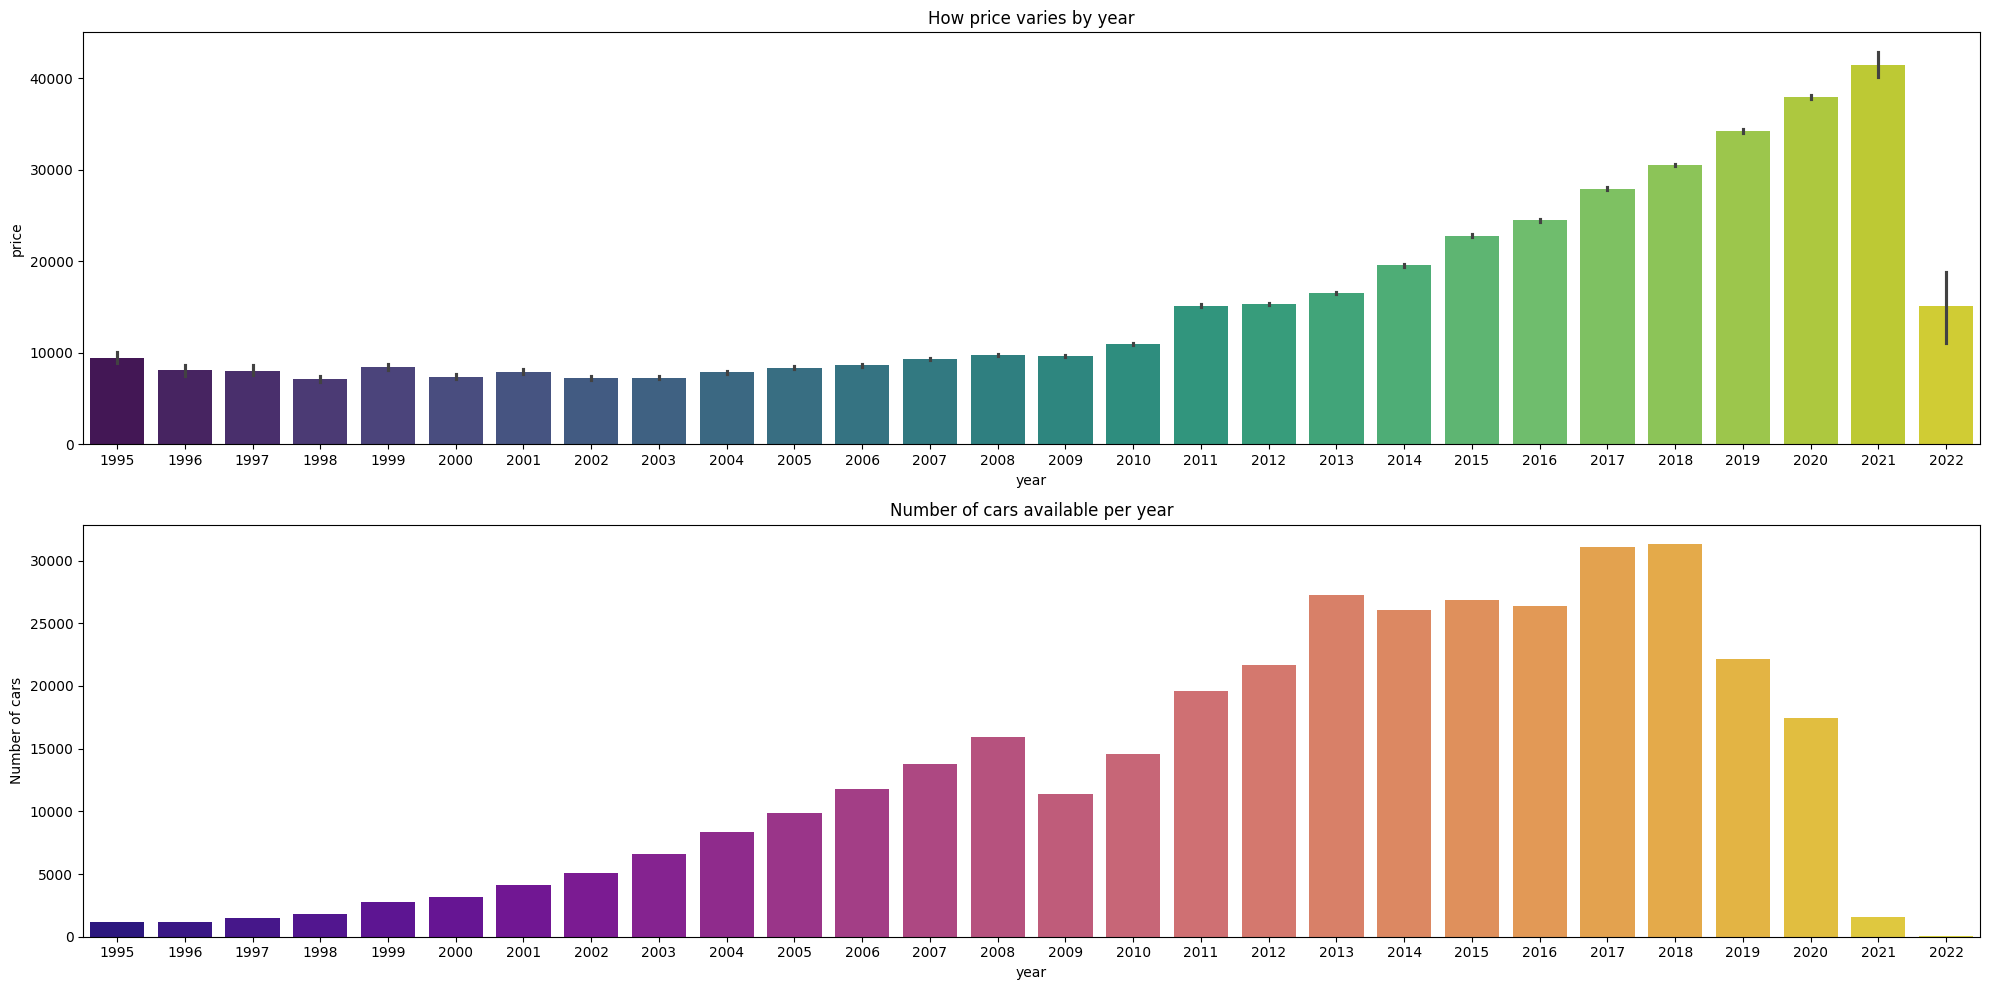

In [58]:
fig, axs = plt.subplots(nrows=2)
fig.set_size_inches(20, 10)

# How price varies by year
sns.barplot(x='year', y='price', data=df, ax=axs[0], palette='viridis')
axs[0].set_title('How price varies by year')

# Number of cars available per year
year_counts = df.groupby('year').count()['price']
sns.barplot(x=year_counts.index, y=year_counts.values, ax=axs[1], palette='plasma')
axs[1].set_title('Number of cars available per year')
axs[1].set_ylabel('Number of cars')

plt.tight_layout()
plt.savefig('price varies by year and umber of cars available per year.jpg', dpi=600)
plt.show()

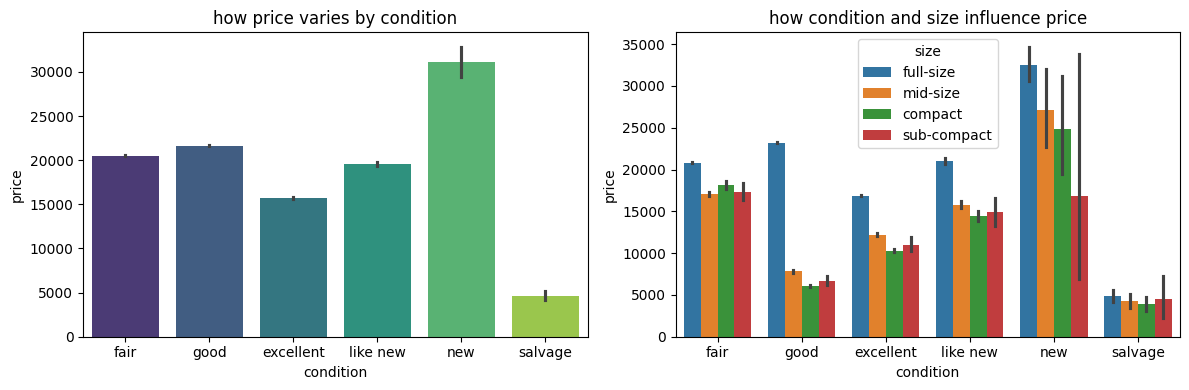

In [59]:
# Visualizes how price varies by condition and how condition and size influence price.
fig,axs=plt.subplots(ncols=2)
fig.set_size_inches(12,4)
sns.barplot(x='condition',y='price',data=df,ax=axs[0], palette='viridis')
sns.barplot(x='condition',y='price',hue='size',data=df,ax=axs[1])
axs[0].set_title('how price varies by condition')
axs[1].set_title('how condition and size influence price')
plt.tight_layout()
plt.savefig('how price varies by condition and how condition and size influence price.jpg',dpi=600)
plt.show()

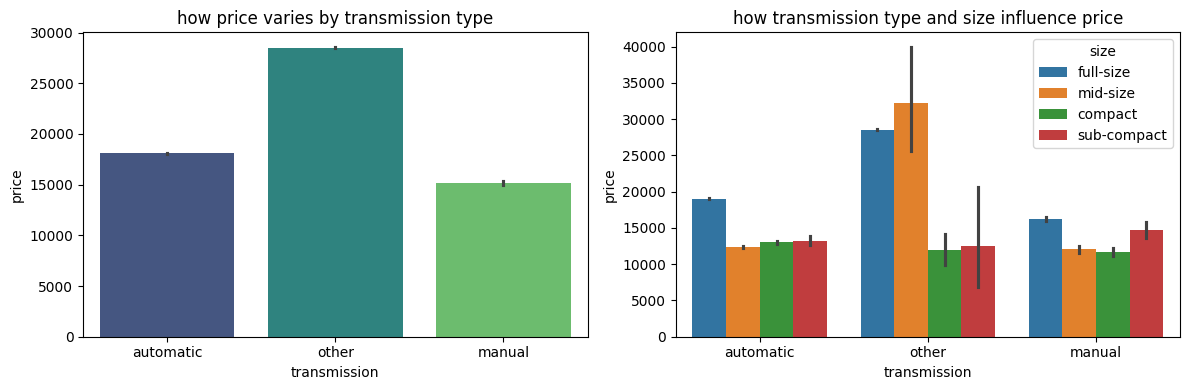

In [60]:
# how price varies by transmission type and how transmission type and size influence price.
fig,axs=plt.subplots(ncols=2)
fig.set_size_inches(12,4)
sns.barplot(x='transmission',y='price',data=df,ax=axs[0], palette='viridis')
sns.barplot(x='transmission',y='price',hue='size',data=df,ax=axs[1])
axs[0].set_title('how price varies by transmission type')
axs[1].set_title('how transmission type and size influence price')
plt.tight_layout()
plt.savefig('how price varies by transmission and how transmission type and size influence price.jpg',dpi=600)
plt.show()

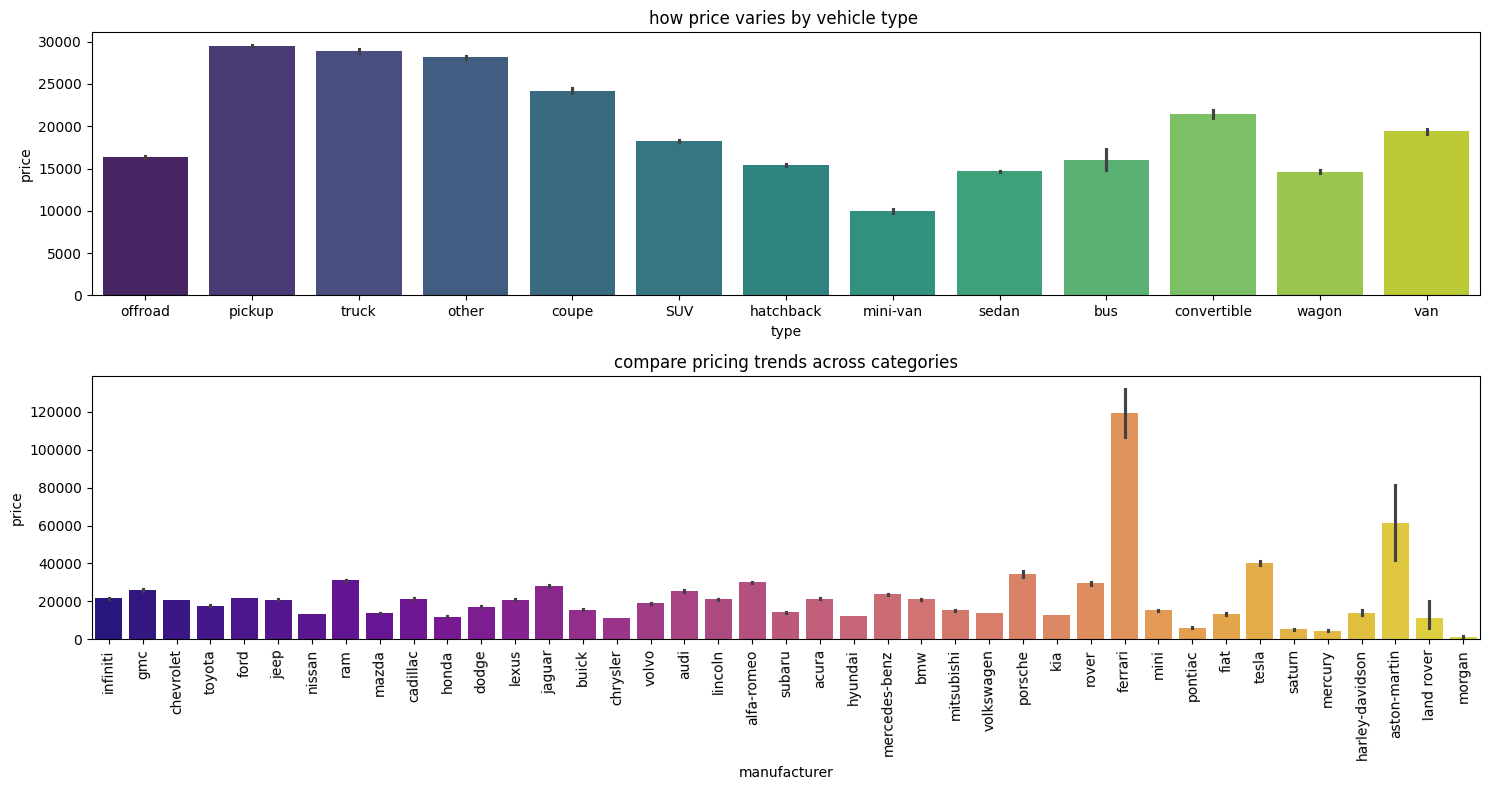

In [61]:
# how price varies by vehicle type and compare pricing trends across categories
fig,axs=plt.subplots(nrows=2)
fig.set_size_inches(15,8)
sns.barplot(x='type',y='price',data=df,ax=axs[0], palette='viridis')
sns.barplot(x='manufacturer',y='price',data=df,ax=axs[1], palette='plasma')
axs[1].set_xticklabels(df.manufacturer.unique(),rotation=91)
axs[0].set_title('how price varies by vehicle type ')
axs[1].set_title('compare pricing trends across categories')
plt.tight_layout()
plt.savefig('how price varies by vehicle type and compare pricing trends across categories.jpg',dpi=600)
plt.show()

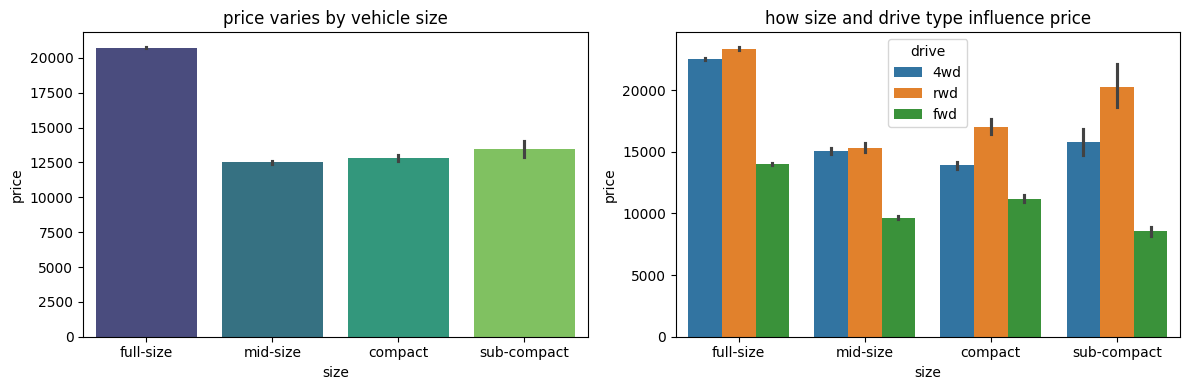

In [62]:
# price varies by vehicle size and how size and drive type influence price
fig,axs=plt.subplots(ncols=2)
fig.set_size_inches(12,4)
sns.barplot(x='size',y='price',data=df,ax=axs[0], palette='viridis')
sns.barplot(x='size',y='price',hue='drive',data=df,ax=axs[1])
axs[0].set_title('price varies by vehicle size')
axs[1].set_title('how size and drive type influence price')
plt.tight_layout()
plt.savefig('price varies by vehicle size and how size and drive type influence price.jpg',dpi=600)
plt.show()

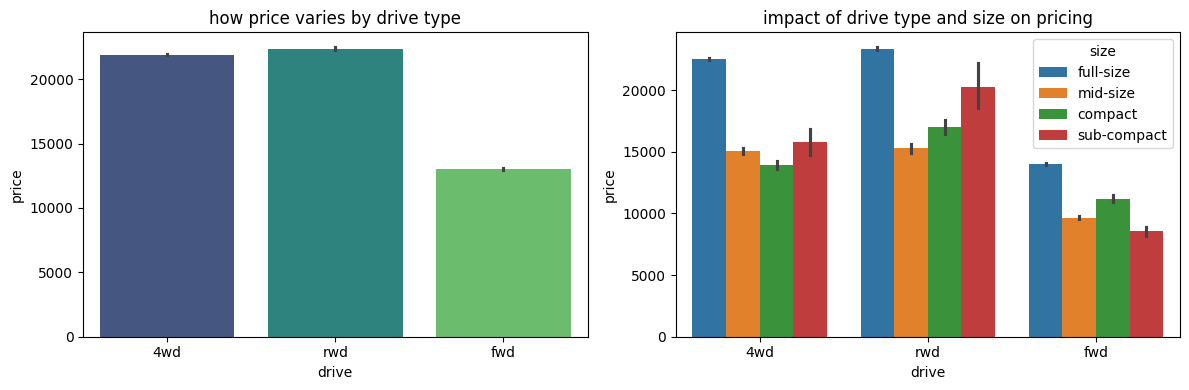

In [63]:
# how price varies by drive type and impact of drive type and size on pricing
fig,axs=plt.subplots(ncols=2)
fig.set_size_inches(12,4)
sns.barplot(x='drive',y='price',data=df,ax=axs[0], palette='viridis')
sns.barplot(x='drive',y='price',hue='size',data=df,ax=axs[1])
axs[0].set_title('how price varies by drive type')
axs[1].set_title('impact of drive type and size on pricing')
plt.tight_layout()
plt.savefig('how price varies by drive type and impact of drive type and size on pricing.jpg',dpi=600)
plt.show()

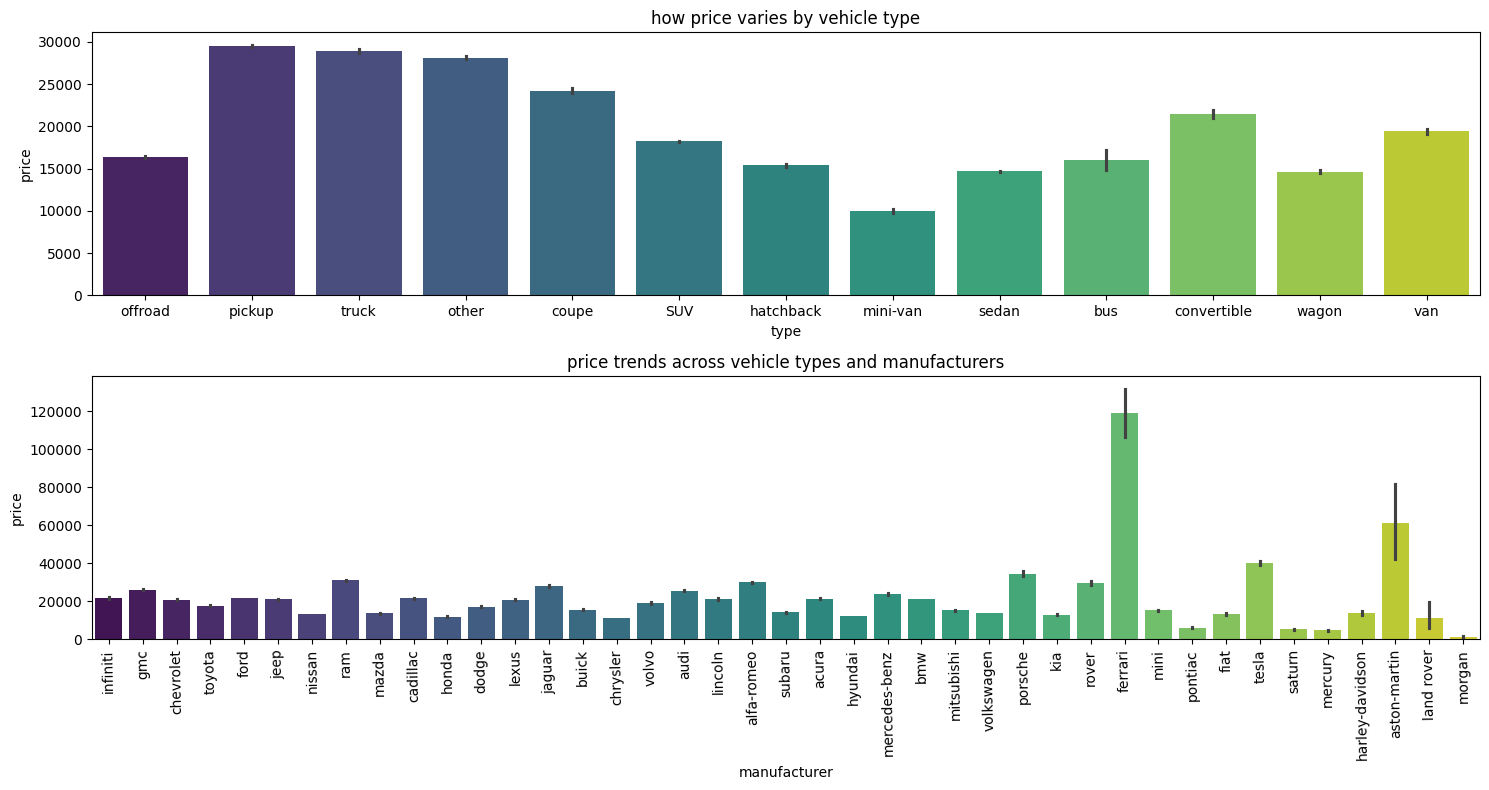

In [64]:
# how price varies by vehicle type and price trends across vehicle types and manufacturers
fig,axs=plt.subplots(nrows=2)
fig.set_size_inches(15,8)
sns.barplot(x='type',y='price',data=df,ax=axs[0], palette='viridis')
sns.barplot(x='manufacturer',y='price',data=df,ax=axs[1], palette='viridis')
axs[1].set_xticklabels(df.manufacturer.unique(),rotation=91)
axs[0].set_title('how price varies by vehicle type')
axs[1].set_title('price trends across vehicle types and manufacturers')
plt.tight_layout()
plt.savefig('how price varies by vehicle type and price trends across vehicle types and manufacturers.jpg',dpi=600)
plt.show()

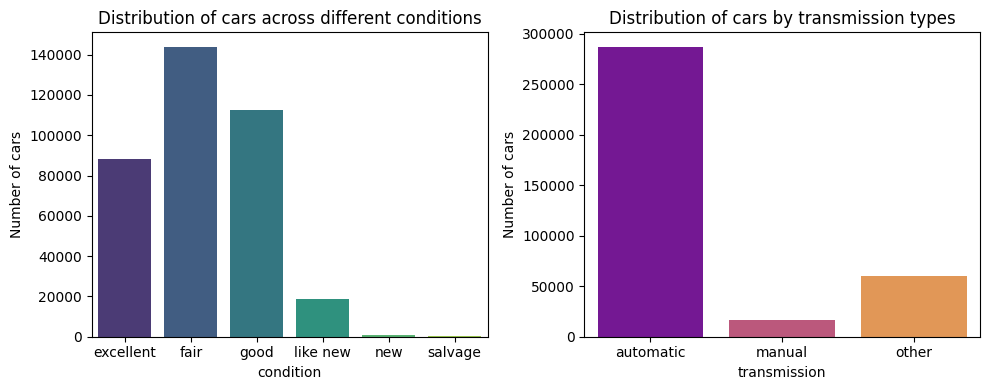

In [65]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10, 4)

# Distribution of cars across different conditions
condition_counts = df.groupby('condition').count()['price']
sns.barplot(x=condition_counts.index, y=condition_counts.values, ax=axs[0], palette='viridis')
axs[0].set_ylabel('Number of cars')
axs[0].set_title('Distribution of cars across different conditions')

# Distribution of cars by transmission types
transmission_counts = df.groupby('transmission').count()['price']
sns.barplot(x=transmission_counts.index, y=transmission_counts.values, ax=axs[1], palette='plasma')
axs[1].set_ylabel('Number of cars')
axs[1].set_title('Distribution of cars by transmission types')

plt.tight_layout()
plt.savefig('Distribution of cars across different conditions and Distribution of cars by transmission types.jpg',dpi=600)
plt.show()

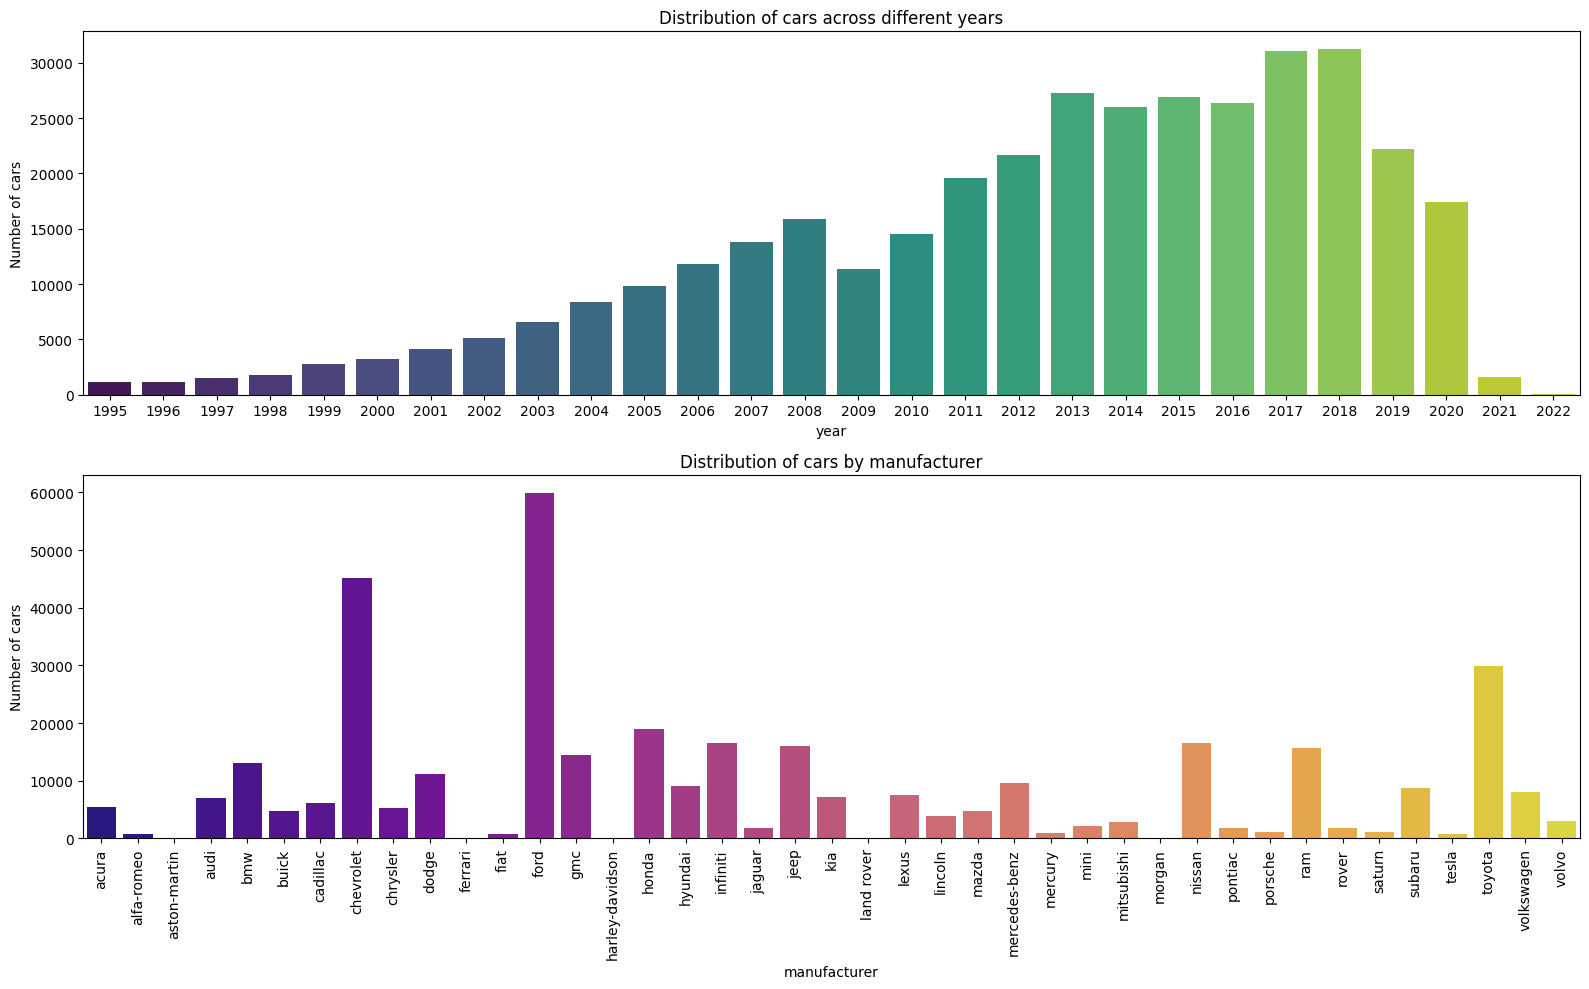

In [66]:
fig, axs = plt.subplots(nrows=2)
fig.set_size_inches(16, 10)

# Distribution of cars across different years
year_counts = df.groupby('year').count()['price']
sns.barplot(x=year_counts.index, y=year_counts.values, ax=axs[0], palette='viridis')
axs[0].set_ylabel('Number of cars')
axs[0].set_title('Distribution of cars across different years')

# Distribution of cars by manufacturer
manufacturer_counts = df.groupby('manufacturer').count()['price']
sns.barplot(x=manufacturer_counts.index, y=manufacturer_counts.values, ax=axs[1], palette='plasma')
axs[1].set_ylabel('Number of cars')
axs[1].set_title('Distribution of cars by manufacturer')
axs[1].set_xticklabels(manufacturer_counts.index, rotation=90)

plt.tight_layout()
plt.savefig('Distribution of cars across different years and Distribution of cars by manufacturer.jpg',dpi=600)
plt.show()

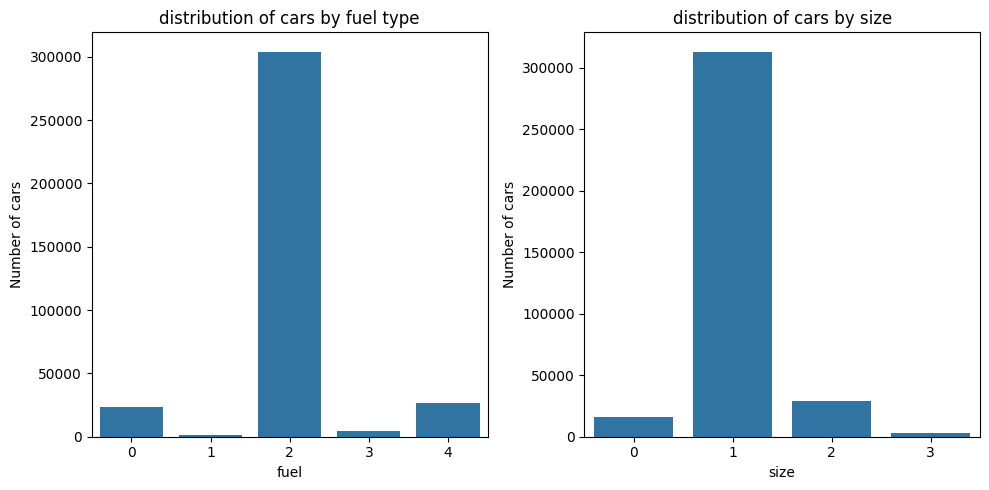

In [93]:
# Distribution of cars by fuel type and Distribution of cars by size
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10, 5)

# distribution of cars by fuel type
sns.barplot(x=df.groupby('fuel').count()['price'].index,
            y=df.groupby('fuel').count()['price'].values,
            ax=axs[0])

# distribution of cars by size
sns.barplot(x=df.groupby('size').count()['price'].index,
            y=df.groupby('size').count()['price'].values,
            ax=axs[1])

axs[0].set_ylabel('Number of cars')
axs[0].set_title('distribution of cars by fuel type')
axs[1].set_ylabel('Number of cars')
axs[1].set_title('distribution of cars by size')

plt.tight_layout()
plt.savefig('Distribution of cars by fuel type and Distribution of cars by size.jpg',dpi=600)
plt.show()

# ***3.   MODEL IMPLEMENTATION***


In [69]:
df=pd.read_csv("vehicles_pre_processed.csv")
df=df.drop('id',axis=1)


df.head()

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,price
0,prescott,2011.23645,infiniti,g series,fair,5 cylinders,gas,98008.073971,clean,automatic,4wd,full-size,offroad,grey,6000
1,fayetteville,2011.23645,infiniti,g series,fair,5 cylinders,gas,98008.073971,clean,automatic,4wd,full-size,offroad,grey,11900
2,florida keys,2011.23645,infiniti,g series,fair,5 cylinders,gas,98008.073971,clean,automatic,4wd,full-size,offroad,grey,21000
3,worcester / central MA,2011.23645,infiniti,g series,fair,5 cylinders,gas,98008.073971,clean,automatic,4wd,full-size,offroad,grey,1500
4,greensboro,2011.23645,infiniti,g series,fair,5 cylinders,gas,98008.073971,clean,automatic,4wd,full-size,offroad,grey,4900


In [70]:
# numerical and categorical values

num_col=['year','odometer']
cat_cols=['region','manufacturer','model','condition','cylinders','fuel','title_status','transmission','drive','size','type','paint_color']


In [72]:
#This initializes an instance of LabelEncoder from the preprocessing module,
#which will be used to convert categorical labels into numeric values.
encoder=preprocessing.LabelEncoder()
df[cat_cols]=df[cat_cols].apply(encoder.fit_transform)
df.head(2)

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,price
0,277,2011.23645,17,12940,1,4,2,98008.073971,0,0,0,1,6,5,6000
1,105,2011.23645,17,12940,1,4,2,98008.073971,0,0,0,1,6,5,11900


In [76]:
# Prepares the dataset by scaling variables so that they are free of outliers.
#scaling numerical data
#Scale numerical features to have a mean of 0 and a standard deviation of 1.
norm = StandardScaler()
# natural log transformation to compress the scale of price
df['price'] = np.log(df['price'])
df['odometer'] = norm.fit_transform(np.array(df['odometer']).reshape(-1,1))
df['year'] = norm.fit_transform(np.array(df['year']).reshape(-1,1))
df['model'] = norm.fit_transform(np.array(df['model']).reshape(-1,1))

#scaling target variable
#Interquartile Range rule to identify and remove outliers
q1,q3=(df['price'].quantile([0.25,0.75]))
o1=q1-1.5*(q3-q1)
o2=q3+1.5*(q3-q1)
df=df[(df.price>=o1) & (df.price<=o2)]

df['region'] = norm.fit_transform(np.array(df['region']).reshape(-1,1))

In [77]:
df.head(2)

,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,price
0,0.702919,-0.229794,17,-0.024698,1,4,2,0.103076,0,0,0,1,6,5,8.699515
1,-0.751890,-0.229794,17,-0.024698,1,4,2,0.103076,0,0,0,1,6,5,9.384294


In [83]:
# Training and test data split
def trainingData(df,n):
    # Extract feature set.
    X = df.iloc[:,n]
    # Target variable is the last column, then transposed (T) and flatten it to a 1D array.
    y = df.iloc[:,-1:].values.T
    y=y[0]
    # 90% training data and 10% test data
    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.9,test_size=0.1,random_state=0)
    return (X_train,X_test,y_train,y_test)

# Passes df and a list of indices (range(len(df.columns) - 1)) corresponding to all columns except the last one.
X_train,X_test,y_train,y_test=trainingData(df,list(range(len(list(df.columns))-1)))

In [84]:
# Handle negative predictions, filters out negative predictions.

def remove_neg(y_test,y_pred):
    ind=[index for index in range(len(y_pred)) if(y_pred[index]>0)]
    y_pred=y_pred[ind]
    y_test=y_test[ind]
    y_pred[y_pred<0]
    return (y_test,y_pred)

#function for evaluation of model
def result(y_test,y_pred):
    r=[]
    r.append(mean_squared_log_error(y_test, y_pred))
    r.append(np.sqrt(r[0]))
    r.append(r2_score(y_test,y_pred))
    r.append(round(r2_score(y_test,y_pred)*100,4))
    return (r)

#dataframe that store the performance of each model
accu=pd.DataFrame(index=['MSLE', 'Root MSLE', 'R2 Score','Accuracy(%)'])

**3.1 Linear Regression**

In [85]:
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)

In [86]:
#calculating error/accuracy
y_test_1,y_pred_1=remove_neg(y_test,y_pred)
r1_lr=result(y_test_1,y_pred_1)
print('Coefficients: \n', LR.coef_)
print("MSLE : {}".format(r1_lr[0]))
print("Root MSLE : {}".format(r1_lr[1]))
print("R2 Score : {} or {}%".format(r1_lr[2],r1_lr[3]))
accu['Linear Regression']=r1_lr


Coefficients: 
 [-0.00238949  0.42829494 -0.00046305 -0.00236551 -0.02827605  0.20153546
 -0.15782653 -0.25082372 -0.09020873  0.057803   -0.08497919 -0.0404295
  0.00224023  0.00544895]
MSLE : 0.002343322317233204
Root MSLE : 0.04840787453744694
R2 Score : 0.6327702348973074 or 63.277%


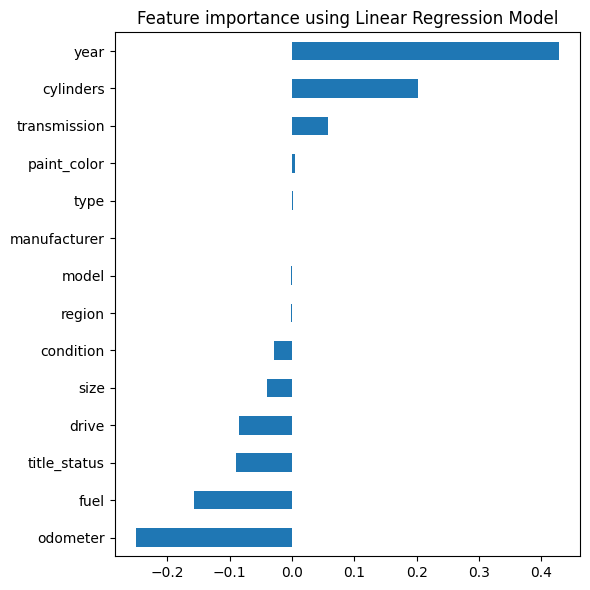

In [92]:
#coefficients of the trained Linear Regression model and associate each coefficient with its corresponding feature name from the training dataset.
coef = pd.Series(LR.coef_, index = X_train.columns)
# Sorts the coefficients
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
# Positive coefficients indicate a positive relationship with the target variable, while negative coefficients show an inverse relationship
plt.title("Feature importance using Linear Regression Model")

plt.tight_layout()
plt.savefig('Linear-Regression-Feature-Importance.jpg')
plt.show()

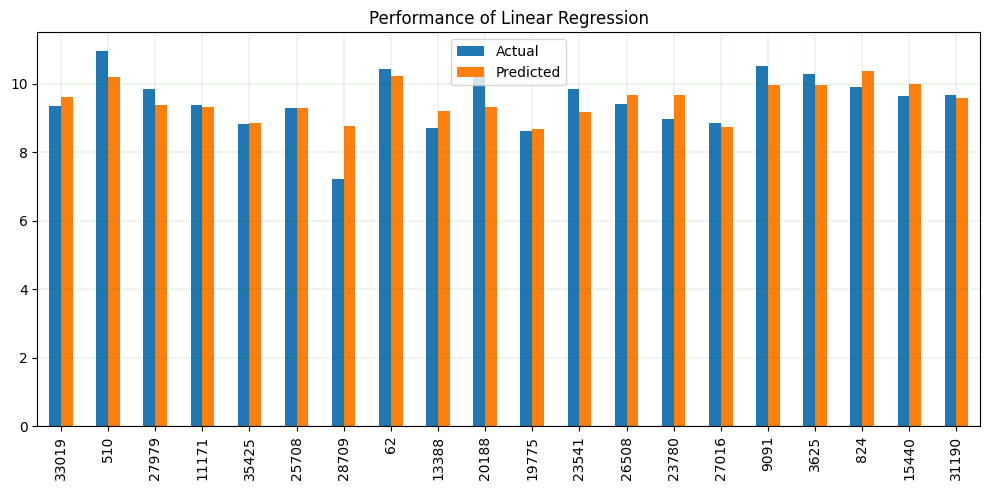

In [94]:
#Visualization of true value and predicted

df_check = pd.DataFrame({'Actual': y_test_1, 'Predicted': y_pred_1})
df_check = df_check.sample(20)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='Green')
plt.title('Performance of Linear Regression')

plt.tight_layout()
plt.savefig('Linear-Regression-Performance.jpg')
plt.show()

**3.2 Ridge Regression**

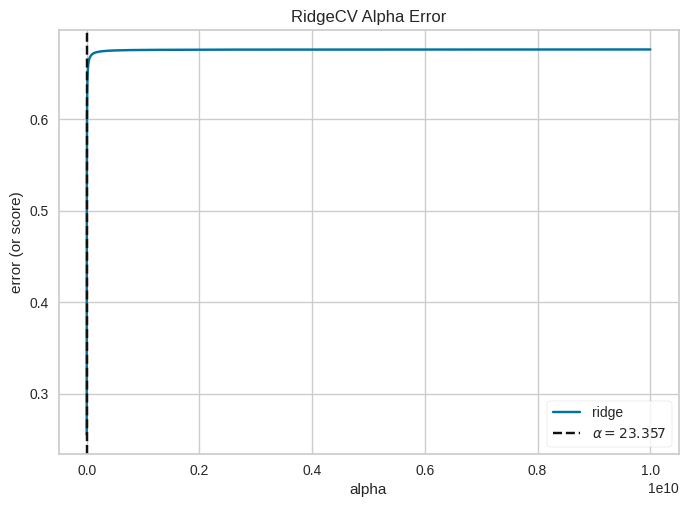

In [97]:
#predicting value of alpha

alphas = 10**np.linspace(10,-2,400)
model = RidgeCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X_train,y_train)
visualizer.show()


#model object and fitting model
RR=Ridge(alpha=20.336,solver='auto')
RR.fit(X_train,y_train)
y_pred=RR.predict(X_test)

In [98]:
#model evaluation

y_test_2,y_pred_2=remove_neg(y_test,y_pred)
r2_ridge=result(y_test_2,y_pred_2)
print("MSLE : {}".format(r2_ridge[0]))
print("Root MSLE : {}".format(r2_ridge[1]))
print("R2 Score : {} or {}%".format(r2_ridge[2],r2_ridge[3]))
accu['Ridge Regression']=r2_ridge

MSLE : 0.0023433244401941905
Root MSLE : 0.04840789646528953
R2 Score : 0.6327697945860546 or 63.277%


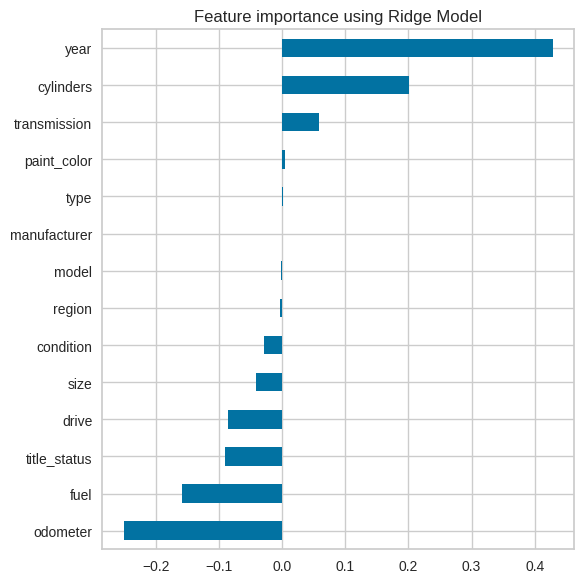

In [99]:
#Visualization of Feature Importance

coef = pd.Series(RR.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model")

plt.tight_layout()
plt.savefig('Ridge-Regression-Feature-Importance.jpg')
plt.show()


**3.3 Lasso Regression**

In [103]:
lasso=Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)

In [104]:
#model evaluation
y_test_3,y_pred_3=remove_neg(y_test,y_pred)
r3_lasso=result(y_test_3,y_pred_3)
print("MSLE : {}".format(r3_lasso[0]))
print("Root MSLE : {}".format(r3_lasso[1]))
print("R2 Score : {} or {}%".format(r3_lasso[2],r3_lasso[3]))
accu['Lasso Regression']=r3_lasso

MSLE : 0.002343332060457273
Root MSLE : 0.04840797517411024
R2 Score : 0.632770854185043 or 63.2771%


In [105]:
accu.to_csv('errors.csv')

# **RESULTS**

In [106]:
accu=pd.read_csv('errors.csv',index_col=0)
accu

,Linear Regression,Ridge Regression,Lasso Regression
MSLE,0.002343,0.002343,0.002343
Root MSLE,0.048408,0.048408,0.048408
R2 Score,0.632770,0.632770,0.632771
Accuracy(%),63.277000,63.277000,63.277100


In [107]:
model_accuracy=accu.loc['Accuracy(%)']

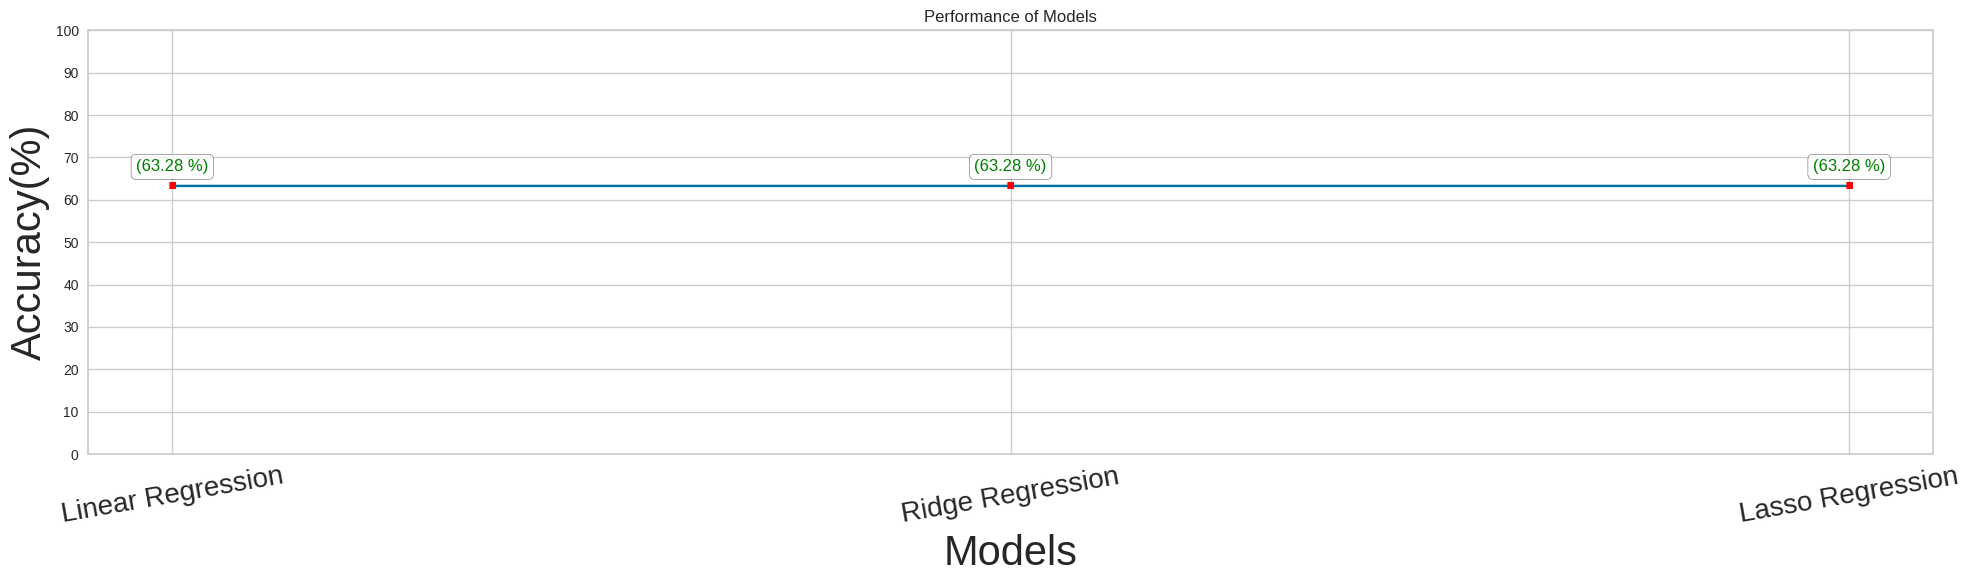

In [108]:
x=list(range(len(model_accuracy)))
y=list(range(0,101,10))
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.figure(figsize=(20,6))
plt.plot(model_accuracy)
plt.yticks(y)
plt.xticks(fontsize=20)
plt.xticks(rotation = (10))
plt.xlabel("Models",fontsize=30)
plt.ylabel("Accuracy(%)",fontsize=30)
plt.title("Performance of Models")
for a,b in zip(x,y):
    b=model_accuracy[a]
    val="("+str(round(model_accuracy[a],2))+" %)"
    plt.text(a, b+4.5, val,horizontalalignment='center',verticalalignment='center',color='green',bbox=props)
    plt.text(a, b+3.5, '.',horizontalalignment='center',verticalalignment='center',color='red',fontsize=50)
plt.tight_layout()
plt.savefig('Overall-Performance.jpg',dpi=600)
plt.show();

Linear Regression has the lowest MSLE (0.0023433223), indicating slightly better performance in predicting the target variable compared to Ridge and Lasso. Linear Regression has the smallest value (0.0484078745), suggesting it is marginally better at minimizing logarithmic errors.

Lasso Regression has the highest R2 (63.2771%), but the difference is negligible (0.0001%) compared to the other models.

Linear Regression is the better model because:
It has the lowest MSLE and Root MSLE, indicating better overall predictive accuracy.

The R2 Score for all models is nearly identical, with no practical advantage in using Ridge or Lasso in this case.